# Jinteki.net Game Log Analysis

Import useful packages

In [65]:
import Pkg; 
Pkg.add("StatsPlots"); 
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta");
Pkg.add("StatsBase");

using StatsBase;
using CSV;
using DataFrames;
using DataFramesMeta;
using StatsPlots;

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.6/Project.toml`
  No Changes to `/opt/julia/environments/v1.6/Manifest.toml`


## Load the data

In [66]:
df = DataFrame(CSV.File("20210416_games.csv"))

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20210416,2,missing,casual,standard,missing,missing,MirrorMorph: Endless Iteration
2,20210416,2,missing,casual,standard,missing,missing,Weyland Consortium: Built to Last
3,20210416,3,missing,casual,standard,missing,missing,Asa Group: Security Through Vigilance
4,20210416,4,missing,casual,standard,missing,missing,Asa Group: Security Through Vigilance
5,20210416,5,missing,casual,standard,missing,missing,SSO Industries: Fueling Innovation
6,20210416,6,missing,casual,startup,missing,missing,Jinteki: Personal Evolution
7,20210416,6,missing,casual,startup,missing,missing,Haas-Bioroid: Precision Design
8,20210416,9,missing,casual,standard,missing,missing,Acme Consulting: The Truth You Need
9,20210416,5,7,casual,standard,runner,Agenda,SSO Industries: Fueling Innovation


In [67]:
size(df)

(75043, 9)

In [68]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,date,2.02103e7,20210201,2.02103e7,20210416
2,time,208.715,0,17.0,106392
3,turn,12.0172,0,12.0,49
4,room,,casual,,competitive
5,format,,casual,,system-gateway
6,winner,,corp,,runner
7,reason,,Agenda,,Tie
8,corp,,Acme Consulting: The Truth You Need,,Weyland Consortium: Built to Last
9,runner,,419: Amoral Scammer,,Zahya Sadeghi: Versatile Smuggler


In [69]:
last(df, 5)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20210201,55,23,casual,standard,missing,missing,Pālanā Foods: Sustainable Growth
2,20210201,8,8,casual,standard,corp,Flatline,SSO Industries: Fueling Innovation
3,20210201,15,3,casual,casual,missing,missing,Jinteki: Personal Evolution
4,20210201,45,15,casual,standard,runner,Agenda,Spark Agency: Worldswide Reach
5,20210201,17,13,casual,standard,corp,Concede,Jinteki: Replicating Perfection


In [70]:
missing_corp = length(findall(x -> ismissing(x), df.corp))

466

In [71]:
missing_runner = length(findall(x -> ismissing(x), df.runner))

813

In [72]:
no_winner = length(findall(x -> ismissing(x), df.winner))

4226

In [73]:
complete = df[completecases(df), :]
disallowmissing!(complete)
size(complete)

(70295, 9)

# Game Length

In [74]:
describe(complete.turn)

Summary Stats:
Length:         70295
Missing Count:  0
Mean:           12.494601
Minimum:        0.000000
1st Quartile:   9.000000
Median:         12.000000
3rd Quartile:   16.000000
Maximum:        49.000000
Type:           Int64


In [75]:
zero_turns = length(findall(x -> x === 0, complete.turn))

466

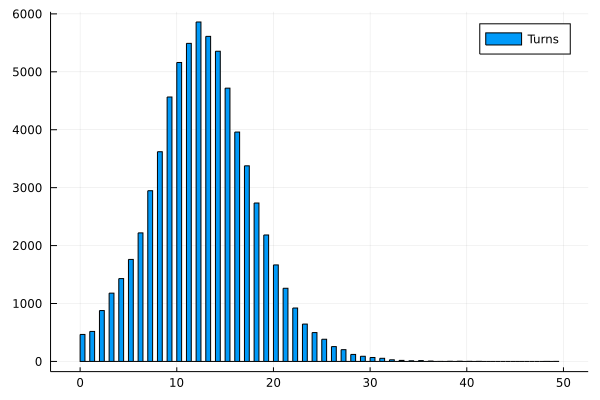

In [76]:
histogram(complete.turn, label="Turns")

In [77]:
describe(complete.time)

Summary Stats:
Length:         70295
Missing Count:  0
Mean:           22.165631
Minimum:        0.000000
1st Quartile:   11.000000
Median:         18.000000
3rd Quartile:   28.000000
Maximum:        275.000000
Type:           Int64


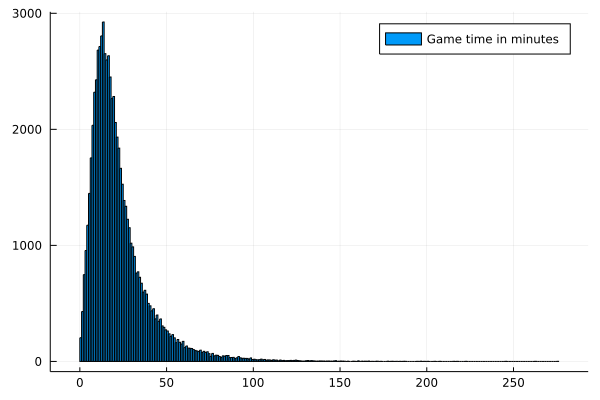

In [78]:
histogram(complete.time, label="Game time in minutes")

In [79]:
with_time_no_max = @where(complete, :time .<= 120, :time .>= 2, :turn .!= 0)
describe(with_time_no_max.time)

Summary Stats:
Length:         69392
Missing Count:  0
Mean:           22.058105
Minimum:        2.000000
1st Quartile:   11.000000
Median:         18.000000
3rd Quartile:   28.000000
Maximum:        120.000000
Type:           Int64


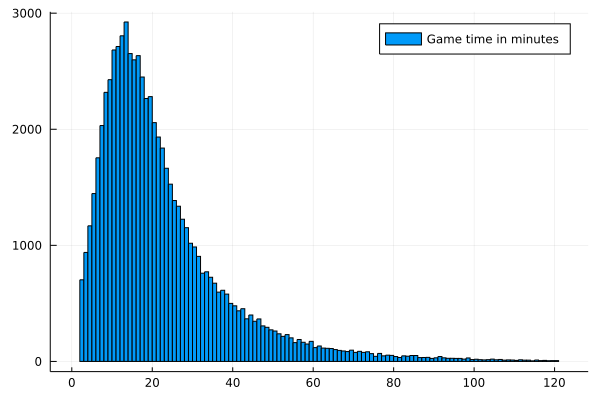

In [48]:
histogram(with_time_no_max.time, label="Game time in minutes")

# Game Outcomes

In [80]:
t0_concede = @where(complete, :turn .== 0, :reason .== "Concede")
size(t0_concede)

(461, 9)

In [81]:
t1_concede = @where(complete, :turn .== 1, :reason == "Concede")

,date,time,turn,room,format,winner,reason,corp,runner
,Int64,Int64,Int64,String,String,String,String,String,String


In [51]:
t0_runner_concede = @where(t0_concede, :winner .== "corp")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210416,1,0,casual,startup,corp,Concede,Haas-Bioroid: Precision Design
2,20210415,1,0,casual,standard,corp,Concede,AgInfusion: New Miracles for a New World
3,20210415,0,0,casual,standard,corp,Concede,MirrorMorph: Endless Iteration
4,20210415,1,0,casual,startup,corp,Concede,Haas-Bioroid: Precision Design
5,20210415,1,0,casual,startup,corp,Concede,Weyland Consortium: Built to Last
6,20210414,0,0,casual,standard,corp,Concede,NBN: Controlling the Message
7,20210414,2,0,casual,standard,corp,Concede,Haas-Bioroid: Precision Design
8,20210414,2,0,casual,system-gateway,corp,Concede,The Syndicate: Profit over Principle
9,20210414,1,0,casual,startup,corp,Concede,GameNET: Where Dreams are Real


In [82]:
rc = countmap(t0_runner_concede.corp)
reverse(sort(collect(rc), by=x->x[2]))

39-element Vector{Pair{String, Int64}}:
                 "Jinteki: Personal Evolution" => 32
        "The Syndicate: Profit over Principle" => 28
             "Jinteki: Replicating Perfection" => 27
                "NBN: Controlling the Message" => 24
              "Haas-Bioroid: Precision Design" => 15
      "Weyland Consortium: Builder of Nations" => 12
                           "NBN: Reality Plus" => 11
           "Weyland Consortium: Built to Last" => 8
            "Near-Earth Hub: Broadcast Center" => 7
 "Weyland Consortium: Building a Better World" => 7
             "Earth Station: SEA Headquarters" => 6
            "Pālanā Foods: Sustainable Growth" => 6
              "Spark Agency: Worldswide Reach" => 6
                                               ⋮
                      "GRNDL: Power Unleashed" => 1
        "Tennin Institute: The Secrets Within" => 1
         "Acme Consulting: The Truth You Need" => 1
          "SSO Industries: Fueling Innovation" => 1
              "Jinte

In [83]:
t0_corp_concede = @where(t0_concede, :winner .== "runner")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210416,0,0,casual,startup,runner,Concede,Weyland Consortium: Built to Last
2,20210416,0,0,casual,standard,runner,Concede,Argus Security: Protection Guaranteed
3,20210416,1,0,casual,startup,runner,Concede,Haas-Bioroid: Precision Design
4,20210415,0,0,casual,standard,runner,Concede,Haas-Bioroid: Precision Design
5,20210415,1,0,casual,standard,runner,Concede,Haas-Bioroid: Precision Design
6,20210415,2,0,casual,standard,runner,Concede,Earth Station: SEA Headquarters
7,20210415,1,0,casual,standard,runner,Concede,Earth Station: SEA Headquarters
8,20210414,1,0,casual,standard,runner,Concede,MirrorMorph: Endless Iteration
9,20210414,0,0,casual,standard,runner,Concede,NBN: Reality Plus


In [84]:
cc = countmap(t0_corp_concede.runner)
reverse(sort(collect(cc), by=x->x[2]))

38-element Vector{Pair{String, Int64}}:
          "The Catalyst: Convention Breaker" => 21
               "Reina Roja: Freedom Fighter" => 16
      "René \"Loup\" Arcemont: Party Animal" => 14
                       "419: Amoral Scammer" => 14
         "Zahya Sadeghi: Versatile Smuggler" => 13
           "Leela Patel: Trained Pragmatist" => 13
        "Tāo Salonga: Telepresence Magician" => 12
         "Sunny Lebeau: Security Specialist" => 9
         "Hoshiko Shiro: Untold Protagonist" => 8
             "Alice Merchant: Clan Agitator" => 8
 "Ele \"Smoke\" Scovak: Cynosure of the Net" => 6
             "Edward Kim: Humanity's Hammer" => 6
                   "MaxX: Maximum Punk Rock" => 5
                                             ⋮
         "Freedom Khumalo: Crypto-Anarchist" => 2
  "Ayla \"Bios\" Rahim: Simulant Specialist" => 2
        "Kabonesa Wu: Netspace Thrillseeker" => 2
        "Rielle \"Kit\" Peddler: Transhuman" => 2
 "Jesminder Sareen: Girl Behind the Curtain" => 2
      

In [85]:
countmap(complete.winner)

Dict{String, Int64} with 2 entries:
  "runner" => 29954
  "corp"   => 40341

In [86]:
countmap(complete.reason)

Dict{String, Int64} with 4 entries:
  "Flatline" => 11039
  "Decked"   => 317
  "Concede"  => 13433
  "Agenda"   => 45506

In [87]:
no_concedes = @where(complete, :reason .!= "Concede")
size(no_concedes)

(56862, 9)

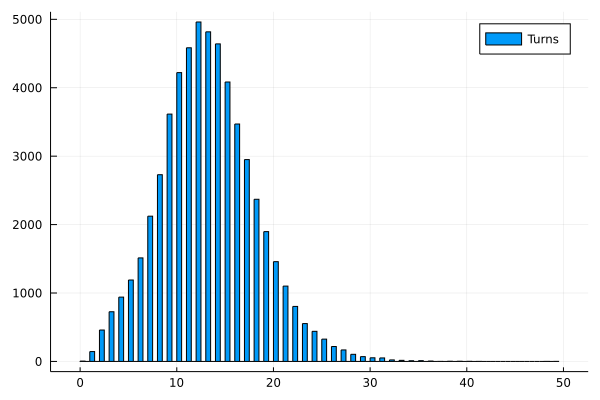

In [58]:
histogram(no_concedes.turn, label="Turns")

In [59]:
describe(no_concedes.turn)

Summary Stats:
Length:         56862
Missing Count:  0
Mean:           12.996799
Minimum:        0.000000
1st Quartile:   10.000000
Median:         13.000000
3rd Quartile:   16.000000
Maximum:        49.000000
Type:           Int64


In [60]:
long_game = @where(complete, :turn .=== 49)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210314,72,49,casual,standard,corp,Agenda,Haas-Bioroid: Architects of Tomorrow


In [61]:
long_game[:, [:turn, :winner, :reason, :corp, :runner]]

,turn,winner,reason,corp,runner
,Int64,String,String,String,String
1,49,corp,Agenda,Haas-Bioroid: Architects of Tomorrow,"Ken ""Express"" Tenma: Disappeared Clone"


In [62]:
concedes = @where(complete, :reason .== "Concede")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210416,0,0,casual,startup,runner,Concede,Weyland Consortium: Built to Last
2,20210416,16,9,casual,startup,runner,Concede,NBN: Reality Plus
3,20210416,3,5,casual,standard,corp,Concede,Jinteki: Personal Evolution
4,20210416,7,5,casual,standard,corp,Concede,Asa Group: Security Through Vigilance
5,20210416,4,5,casual,standard,corp,Concede,Haas-Bioroid: Precision Design
6,20210416,4,5,casual,standard,runner,Concede,Acme Consulting: The Truth You Need
7,20210416,13,8,casual,startup,corp,Concede,Jinteki: Restoring Humanity
8,20210416,1,2,casual,standard,corp,Concede,SSO Industries: Fueling Innovation
9,20210416,17,11,casual,standard,corp,Concede,Acme Consulting: The Truth You Need


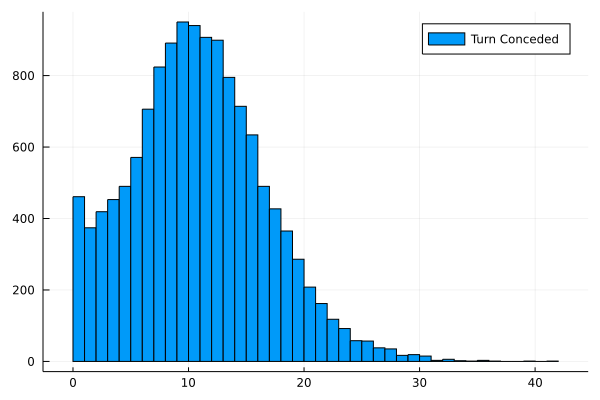

In [63]:
histogram(concedes.turn, label="Turn Conceded")

In [64]:
format_count = countmap(complete.format)

Dict{String, Int64} with 9 entries:
  "system-gateway"  => 2152
  "classic"         => 76
  "startup"         => 6386
  "casual"          => 5996
  "standard"        => 54115
  "snapshot-plus"   => 53
  "core-experience" => 953
  "eternal"         => 536
  "snapshot"        => 28